In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv("train.csv")

In [48]:
num_cols = [
    "SalePrice",
    "LotFrontage",
    "LotArea",#
    "OverallQual",#
    "OverallCond",#
    "YearBuilt",#
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",#
    "1stFlrSF",#
    "2ndFlrSF",#
    "LowQualFinSF",#
    "GrLivArea",#
    "BsmtHalfBath",
    "BsmtFullBath",
    "FullBath",#
    "HalfBath",#
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold"
]

df_nums = df[num_cols]

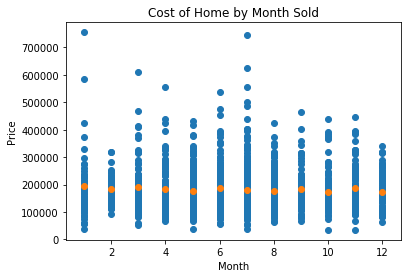

In [10]:
plt.scatter(df.MoSold, df.SalePrice)
plt.scatter(df.MoSold.unique(), df.groupby("MoSold").SalePrice.mean())
plt.ylabel("Price")
plt.xlabel("Month")
plt.title("Cost of Home by Month Sold")

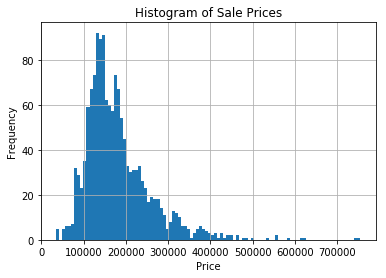

In [11]:
df.SalePrice.hist(bins=100)
df.SalePrice.describe()
plt.title("Histogram of Sale Prices")
plt.ylabel("Frequency")
plt.xlabel("Price")

In [ ]:
#pd.scatter_matrix(df_nums, figsize=(60,60))

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


# Describe categorical features

##### Make a function that does the following:
-  Takes the dataframe of the house price data plus a categorical feature to look at 
-  Gives you the count/mean/median/min/max of the SalePrice for each of the categories
-  Plots a histogram of the SalePrice for each category 

MSSubClass | 60
	Mean: 239948.501672 
	Median: 215200
	Minimum: 129000 
	Maximum: 755000 
	Count: 299 



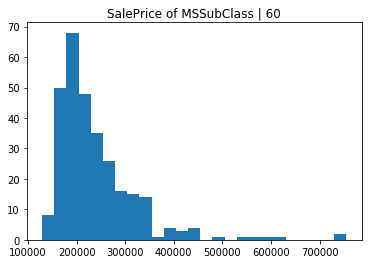

MSSubClass | 20
	Mean: 185224.811567 
	Median: 159250
	Minimum: 35311 
	Maximum: 611657 
	Count: 536 



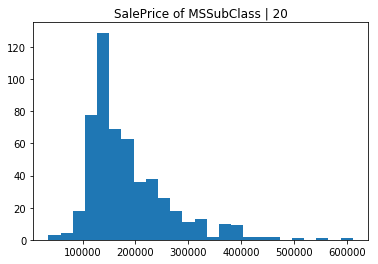

MSSubClass | 70
	Mean: 166772.416667 
	Median: 156000
	Minimum: 40000 
	Maximum: 359100 
	Count: 60 



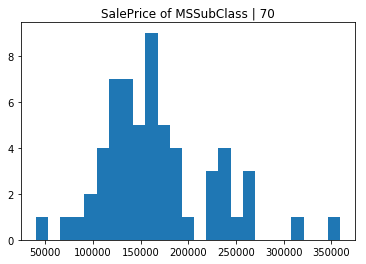

MSSubClass | 50
	Mean: 143302.972222 
	Median: 132000
	Minimum: 37900 
	Maximum: 410000 
	Count: 144 



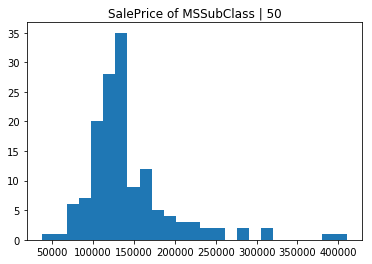

MSSubClass | 190
	Mean: 129613.333333 
	Median: 128250
	Minimum: 55000 
	Maximum: 228950 
	Count: 30 



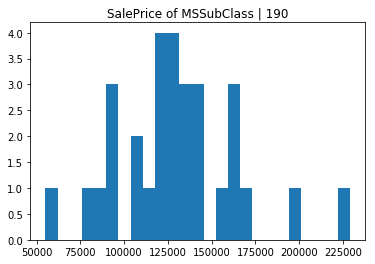

MSSubClass | 45
	Mean: 108591.666667 
	Median: 107500
	Minimum: 76000 
	Maximum: 139400 
	Count: 12 



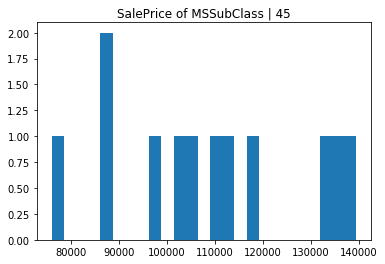

MSSubClass | 90
	Mean: 133541.076923 
	Median: 135980
	Minimum: 82000 
	Maximum: 206300 
	Count: 52 



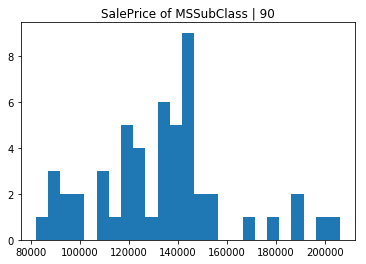

MSSubClass | 120
	Mean: 200779.08046 
	Median: 192000
	Minimum: 99500 
	Maximum: 392500 
	Count: 87 



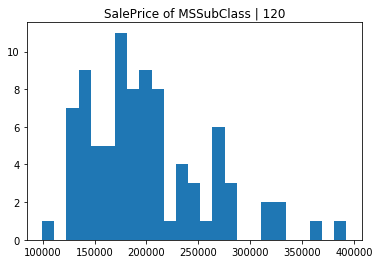

MSSubClass | 30
	Mean: 95829.7246377 
	Median: 99900
	Minimum: 34900 
	Maximum: 163500 
	Count: 69 



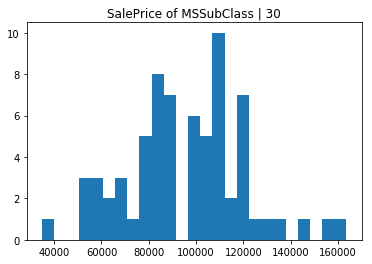

MSSubClass | 85
	Mean: 147810.0 
	Median: 140750
	Minimum: 123000 
	Maximum: 198500 
	Count: 20 



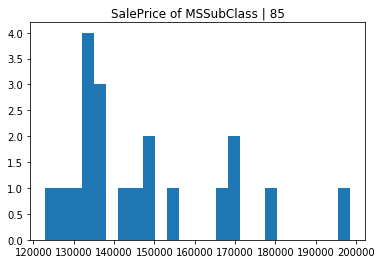

MSSubClass | 80
	Mean: 169736.551724 
	Median: 166500
	Minimum: 107000 
	Maximum: 345000 
	Count: 58 



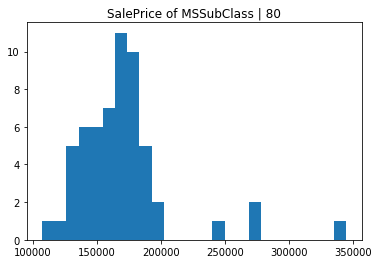

MSSubClass | 160
	Mean: 138647.380952 
	Median: 146000
	Minimum: 75000 
	Maximum: 239000 
	Count: 63 



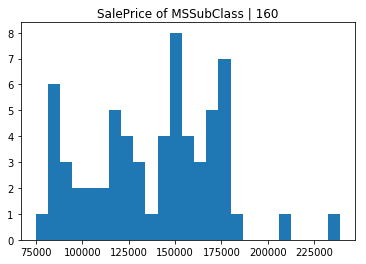

MSSubClass | 75
	Mean: 192437.5 
	Median: 163500
	Minimum: 101000 
	Maximum: 475000 
	Count: 16 



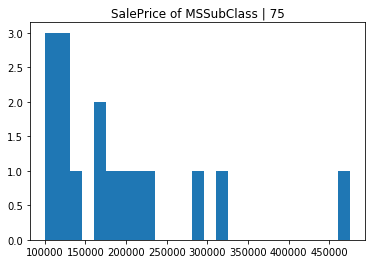

MSSubClass | 180
	Mean: 102300.0 
	Median: 88500
	Minimum: 75500 
	Maximum: 148000 
	Count: 10 



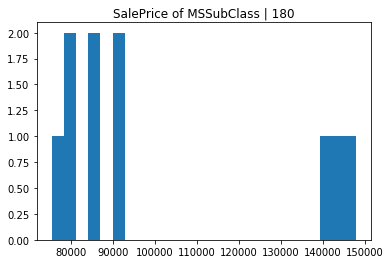

MSSubClass | 40
	Mean: 156125.0 
	Median: 142500
	Minimum: 79500 
	Maximum: 260000 
	Count: 4 



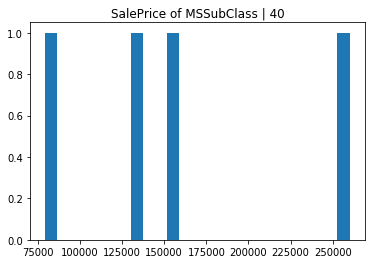

True

In [12]:
def describe_categorical_feature(data, category, bins):
    arr = data[category]
    
    gb = data.groupby(category).SalePrice
    mean = gb.mean()
    median = gb.median()
    mini = gb.min()
    maxi = gb.max()
    ct = gb.count()
    
    for cat in data[category].unique():
        print category,"|", cat
        print "\tMean:", mean[cat], "\n\tMedian:", median[cat]
        print "\tMinimum:",mini[cat],"\n\tMaximum:",maxi[cat],"\n\tCount:",ct[cat],"\n"
        plt.figure()
        plt.hist(data[arr.map(lambda x: x == cat)].SalePrice,bins=bins)
        titl = "SalePrice of %s | %s" % (category, cat)
        plt.title(titl)
        plt.show()
        
    return True

# Do this with all the categorical features and look at them...

# MSSubClass is the building class 
describe_categorical_feature(df, "MSSubClass",25)



In [49]:
cat_cols = [i for i in df.columns if i not in num_cols]
df_cat = df[cat_cols]

df_cat = pd.get_dummies(df_cat)
df_all = pd.concat([df_nums, df_cat], axis=1)
df_all.head(5)

y = df_all.SalePrice
df_all.__delitem__("SalePrice")
X = df_all

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor()
print cross_val_score(dt, X.fillna(0),y, cv=5)

[ 0.72617664  0.7074978   0.84678626  0.77945581  0.5597122 ]


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
print cross_val_score(rf, X.fillna(0),y, cv=5)

[ 0.85994621  0.81814606  0.85813591  0.87053543  0.79392275]


# Split numerical attributes into groups
-  Necessary to look at possible repetative attributes
-  Easier to read pair plots

In [50]:
lot = [
    "SalePrice",
    "LotFrontage",
    "LotArea"
]

major = [
    "SalePrice",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "YrSold",
    "MiscVal",
    "MoSold",
]

basement = [
    "SalePrice",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF"
]

floors = [
    "SalePrice",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea"
]

rooms = [
    "SalePrice",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
]

bathrooms = [
    "SalePrice",
    "BsmtHalfBath",
    "BsmtFullBath",
    "FullBath",
    "HalfBath",
]

garage = [
    "SalePrice",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
]
    
outdoors = [
    "SalePrice",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MasVnrArea"
]

year = [
    "SalePrice",
    "GarageYrBlt",
    "YearBuilt",
    "YearRemodAdd",
]

## Garage Evaluation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d3b9c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1db6dd10>]], dtype=object)

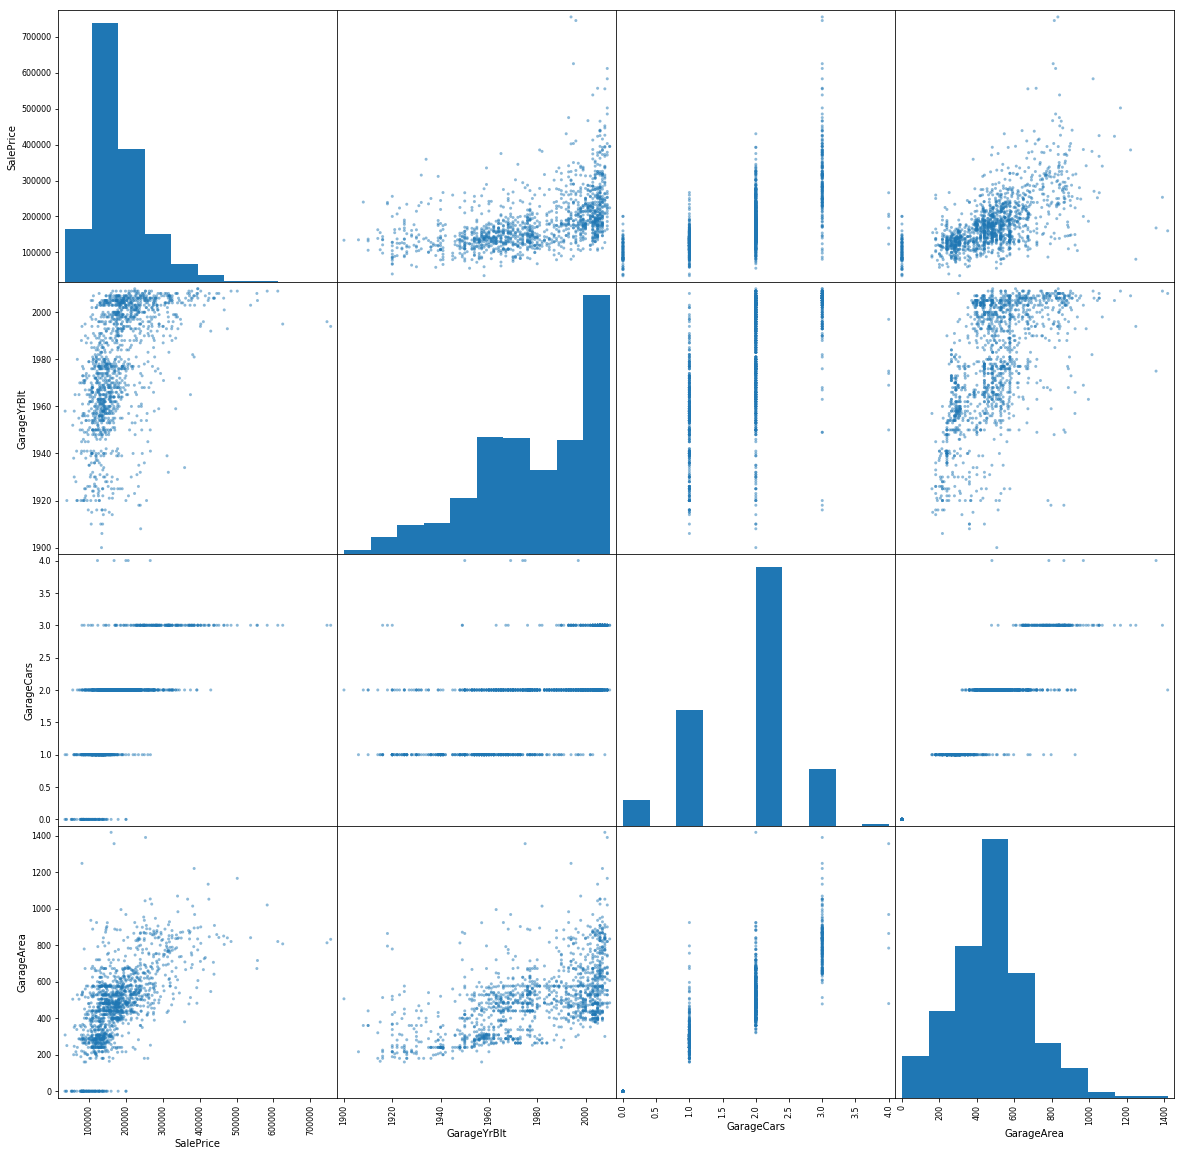

In [17]:
pd.scatter_matrix(df[garage], figsize=(20,20))

In [18]:
df[garage].corr()

,SalePrice,GarageYrBlt,GarageCars,GarageArea
SalePrice,1.000000,0.486362,0.640409,0.623431
GarageYrBlt,0.486362,1.000000,0.588920,0.564567
GarageCars,0.640409,0.588920,1.000000,0.882475
GarageArea,0.623431,0.564567,0.882475,1.000000


In [19]:
df[garage].head(20)

,SalePrice,GarageYrBlt,GarageCars,GarageArea
0,208500,2003.0,2,548
1,181500,1976.0,2,460
2,223500,2001.0,2,608
3,140000,1998.0,3,642
4,250000,2000.0,3,836
5,143000,1993.0,2,480
6,307000,2004.0,2,636
7,200000,1973.0,2,484
8,129900,1931.0,2,468
9,118000,1939.0,1,205


In [20]:
print "Range of GarageArea given GarageCars == [1,2,3,4]\n"

print df[df.GarageCars == 1].GarageArea.describe()
print df[df.GarageCars == 2].GarageArea.describe()
print df[df.GarageCars == 3].GarageArea.describe()
print df[df.GarageCars == 4].GarageArea.describe()

Range of GarageArea given GarageCars == [1,2,3,4]

count    369.000000
mean     300.517615
std       87.804287
min      160.000000
25%      250.000000
50%      288.000000
75%      325.000000
max      924.000000
Name: GarageArea, dtype: float64
count     824.000000
mean      519.797330
std        98.814314
min       320.000000
25%       450.000000
50%       506.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
count     181.000000
mean      811.574586
std       126.800855
min       478.000000
25%       732.000000
50%       818.000000
75%       870.000000
max      1390.000000
Name: GarageArea, dtype: float64
count       5.000000
mean      890.400000
std       317.510315
min       480.000000
25%       784.000000
50%       864.000000
75%       968.000000
max      1356.000000
Name: GarageArea, dtype: float64


### Garage
-  GarageCars information seems to be a function of GarageArea, though the area of 3 and 4 car garages have similar distributions. There are very few (5 out of 1460) 4-car-garage homes. It may be reasonable to put 3 and 4 car garages together as one category. GarageCars and GarageArea have a correlation of 0.88. GarageCars has a high correlation with SalePrice. One of these should be removed.


    REMOVE GarageArea

In [21]:
df[garage].corr()

,SalePrice,GarageYrBlt,GarageCars,GarageArea
SalePrice,1.000000,0.486362,0.640409,0.623431
GarageYrBlt,0.486362,1.000000,0.588920,0.564567
GarageCars,0.640409,0.588920,1.000000,0.882475
GarageArea,0.623431,0.564567,0.882475,1.000000


In [22]:
df_test = df.copy()
df_test.GarageCars = df_test.GarageCars.map(lambda x: 3 if (x==4) else x)
df_test[garage].corr()

,SalePrice,GarageYrBlt,GarageCars,GarageArea
SalePrice,1.000000,0.486362,0.646652,0.623431
GarageYrBlt,0.486362,1.000000,0.599204,0.564567
GarageCars,0.646652,0.599204,1.000000,0.882971
GarageArea,0.623431,0.564567,0.882971,1.000000


### Garage
-  Making 4 car garages the same category as 3 car garages increases GarageCars correlation with SalePrice by 0.0066. This is not high because there are only 5 homes with 4 car garages, but is an improvement. 


    COMBINE GarageCars == 3 AND GarageCars == 4 AS ONE CATEGORY

## Year Evaluation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,SalePrice,GarageYrBlt,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.486362,0.522897,0.507101
GarageYrBlt,0.486362,1.000000,0.825667,0.642277
YearBuilt,0.522897,0.825667,1.000000,0.592855
YearRemodAdd,0.507101,0.642277,0.592855,1.000000


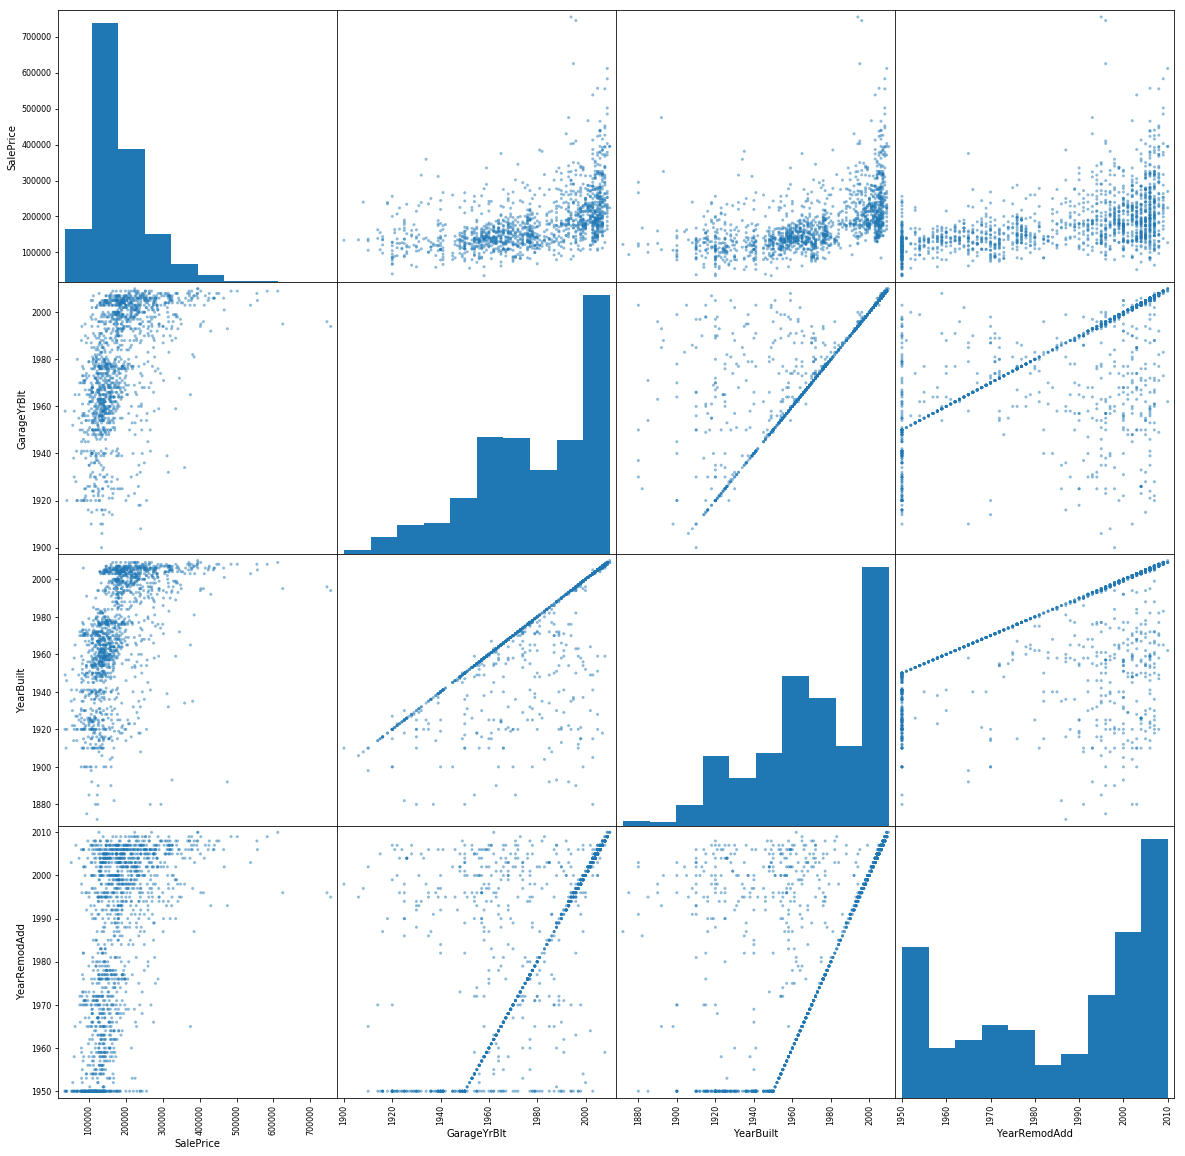

In [23]:
pd.scatter_matrix(df[year], figsize=(20,20))
df[year].corr()

### Year 
-  YearBuilt is clearly a lower bound on YearRemodAdd and GarageYrBlt
-  GarageYrBlt and YearBuilt have a high correlation of 0.82. YearBuilt has a higher correlation to SalePrice than GarageYrBlt. GarageYrBlt may be removed.


    CONSIDER REMOVING GarageYrBlt

In [24]:
print "There are", pd.isnull(df.GarageYrBlt).sum(), "NaNs in GarageYrBlt."

There are 81 Nans in GarageYrBlt.


In [25]:
df_test.GarageYrBlt = df_test.GarageYrBlt.fillna(df_test.GarageYrBlt.median())

df_test[year].corr()

,SalePrice,GarageYrBlt,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.466754,0.522897,0.507101
GarageYrBlt,0.466754,1.000000,0.777182,0.616444
YearBuilt,0.522897,0.777182,1.000000,0.592855
YearRemodAdd,0.507101,0.616444,0.592855,1.000000


In [26]:
from sklearn.decomposition import PCA
year_noprice = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']
year_single = pd.DataFrame(PCA(n_components=1).fit_transform(df_test[year_noprice]))

In [27]:
year_single["price"] = df.SalePrice
year_single.corr()

,0,price
0,1.000000,-0.558781
price,-0.558781,1.000000


### Year
-  performing PCA on the 3 year variabes after filling GarageYrBlt's Nans with the median year produced a varible with a higher correlation to SalePrice (0.558) than the other 3 variables. Explore using this varibale...


    CONSIDER USING PCA

## Bathroom Evaluation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,SalePrice,BsmtHalfBath,BsmtFullBath,FullBath,HalfBath
SalePrice,1.000000,-0.016844,0.227122,0.560664,0.284108
BsmtHalfBath,-0.016844,1.000000,-0.147871,-0.054536,-0.012340
BsmtFullBath,0.227122,-0.147871,1.000000,-0.064512,-0.030905
FullBath,0.560664,-0.054536,-0.064512,1.000000,0.136381
HalfBath,0.284108,-0.012340,-0.030905,0.136381,1.000000


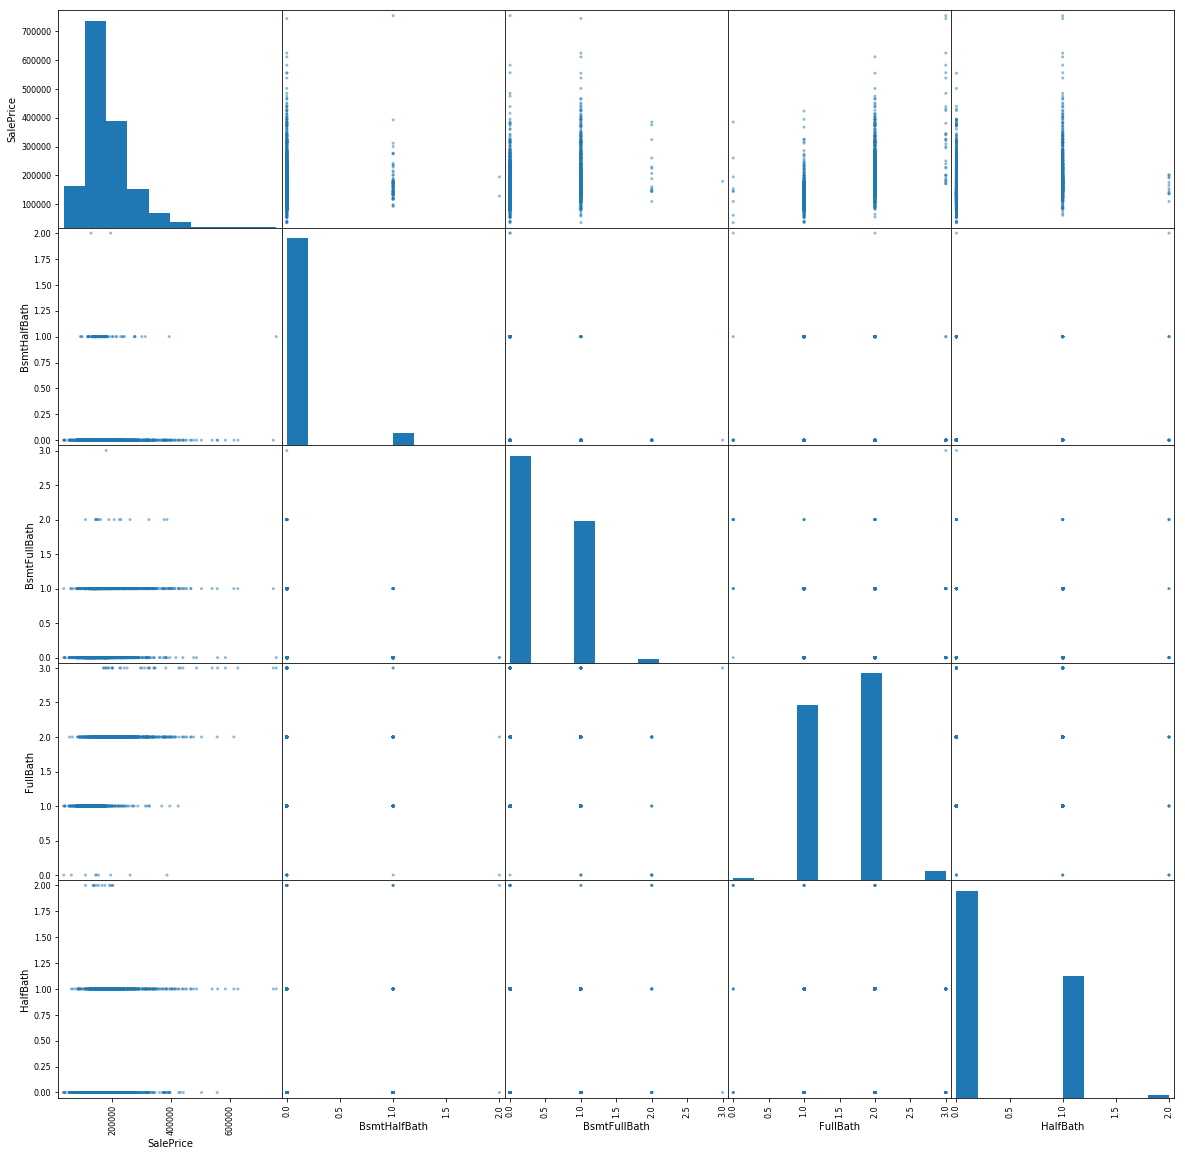

In [28]:
pd.scatter_matrix(df[bathrooms], figsize=(20,20))
df[bathrooms].corr()

In [29]:
test = pd.DataFrame(df_test.BsmtFullBath.astype(float) + df_test.BsmtHalfBath.astype(float)/2)
print test.describe()
test["sales"] = df.SalePrice
test.corr()

                 0
count  1460.000000
mean      0.454110
std       0.514975
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       3.000000


,0,sales
0,1.000000,0.224953
sales,0.224953,1.000000


### Bathrooms
-  The number of halfbaths in the basement seems to have no relationship to the SalePrice. Adding this number to the number of full bathrooms in the basement does not improve correlation to SalePrice. This may be removed. 
-  The number of full baths has the highest coorelation to SalePrice, 0.55. 
-  None of the bathroom variables have a significantly high correlation with each other to the point that we should consider removing redundant features. 


    REMOVE BsmtHalfBath 
    CONSIDER REMOVING BsmtFullBath

## Room Evaluation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,SalePrice,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
SalePrice,1.000000,0.168213,-0.135907,0.533723,0.466929
BedroomAbvGr,0.168213,1.000000,0.198597,0.676620,0.107570
KitchenAbvGr,-0.135907,0.198597,1.000000,0.256045,-0.123936
TotRmsAbvGrd,0.533723,0.676620,0.256045,1.000000,0.326114
Fireplaces,0.466929,0.107570,-0.123936,0.326114,1.000000


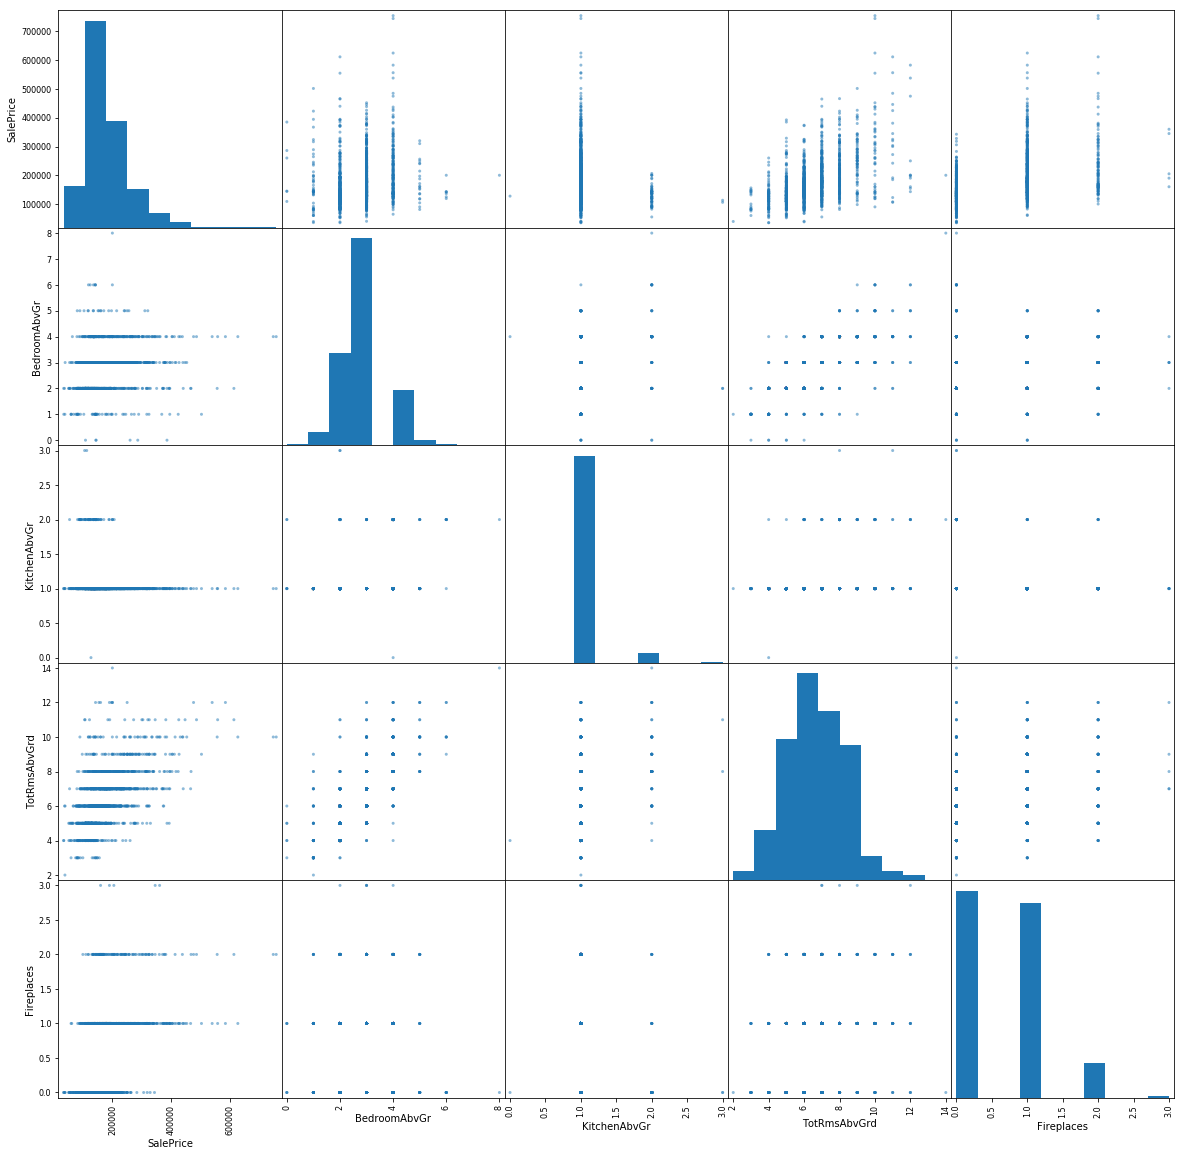

In [30]:
pd.scatter_matrix(df[rooms], figsize=(20,20))
df[rooms].corr()

KitchenAbvGr | 1
	Mean: 183388.79023 
	Median: 165550
	Minimum: 34900 
	Maximum: 755000 
	Count: 1392 



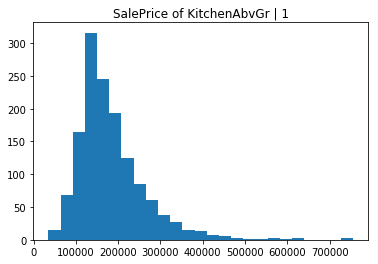

KitchenAbvGr | 2
	Mean: 131096.153846 
	Median: 133900
	Minimum: 55000 
	Maximum: 206300 
	Count: 65 



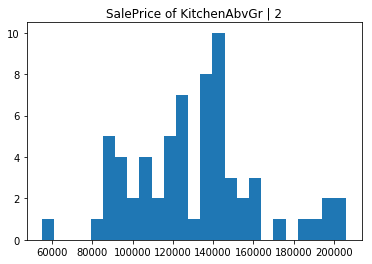

KitchenAbvGr | 3
	Mean: 109500.0 
	Median: 109500
	Minimum: 106000 
	Maximum: 113000 
	Count: 2 



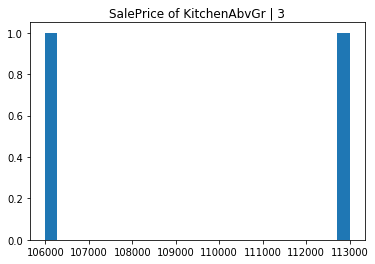

KitchenAbvGr | 0
	Mean: 127500.0 
	Median: 127500
	Minimum: 127500 
	Maximum: 127500 
	Count: 1 



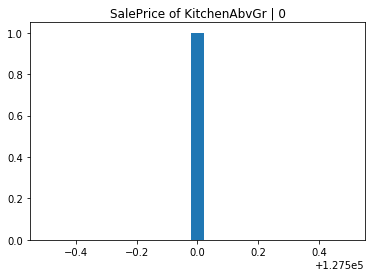

True

In [31]:
describe_categorical_feature(df, "KitchenAbvGr",25)

### Rooms
-  Oddly, the number of kitchens seems to be negatively correlated with price. Also, there is a simple home with zero kitchens. This should be grouped with homes with 1 kitchen. There are also 2 homes with 3 kitchens. These homes can be grouped with the homes with 2 kitchens.
-  Bedrooms and total rooms are highly correlated (0.68) but not enough to warrent combination. 

    COMBINE KitchenAbvGr == 0 AND KitchenAbvGr == 1
    
    CONSIDER COMBINE KitchenAbvGr == 2 AND KitchenAbvGr == 3

## Lot Evalutation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,SalePrice,LotFrontage,LotArea
SalePrice,1.000000,0.351799,0.263843
LotFrontage,0.351799,1.000000,0.426095
LotArea,0.263843,0.426095,1.000000


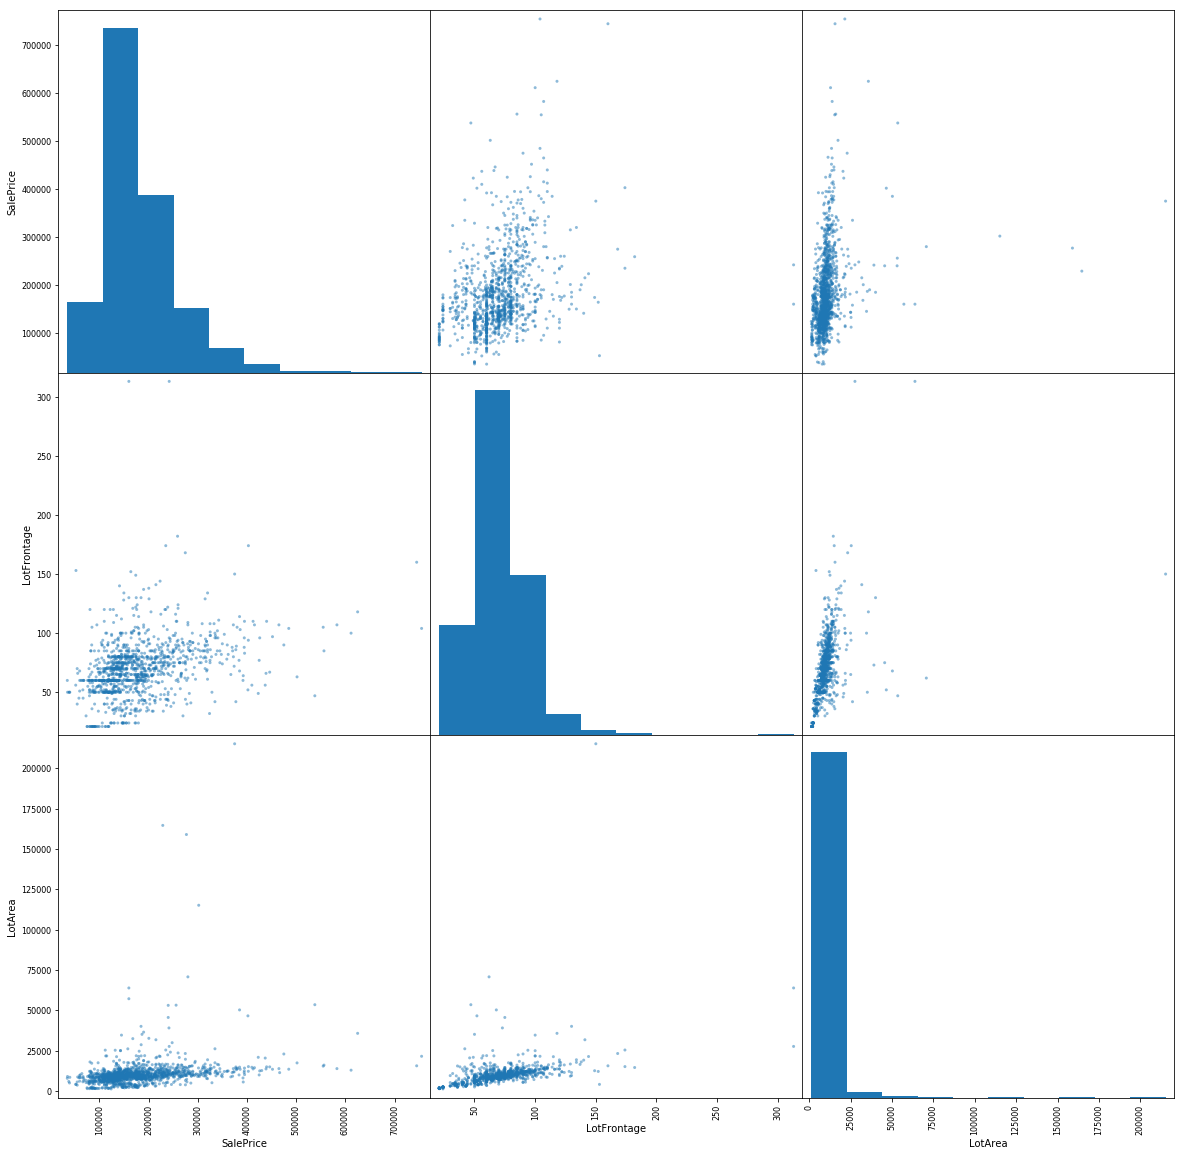

In [32]:
pd.scatter_matrix(df[lot], figsize=(20,20))
df[lot].corr()

In [34]:
print df.LotFrontage.describe()
print
print df.LotArea.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


In [35]:
print "There are", pd.isnull(df.LotFrontage).sum(), "NaNs in LotFrontage."

There are 259 Nans in LotFrontage.


### Lot
- There suprisingly isn't a ton of correlation between LotFrontage or LotArea and Sale Price. LotFrontage is the Linear feet of street connected to property while LotArea is the size of the lot in square feet.

## Major Group Evaluation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,SalePrice,OverallQual,OverallCond,YearBuilt,YearRemodAdd,YrSold,MiscVal,MoSold
SalePrice,1.000000,0.790982,-0.077856,0.522897,0.507101,-0.028923,-0.021190,0.046432
OverallQual,0.790982,1.000000,-0.091932,0.572323,0.550684,-0.027347,-0.031406,0.070815
OverallCond,-0.077856,-0.091932,1.000000,-0.375983,0.073741,0.043950,0.068777,-0.003511
YearBuilt,0.522897,0.572323,-0.375983,1.000000,0.592855,-0.013618,-0.034383,0.012398
YearRemodAdd,0.507101,0.550684,0.073741,0.592855,1.000000,0.035743,-0.010286,0.021490
YrSold,-0.028923,-0.027347,0.043950,-0.013618,0.035743,1.000000,0.004906,-0.145721
MiscVal,-0.021190,-0.031406,0.068777,-0.034383,-0.010286,0.004906,1.000000,-0.006495
MoSold,0.046432,0.070815,-0.003511,0.012398,0.021490,-0.145721,-0.006495,1.000000


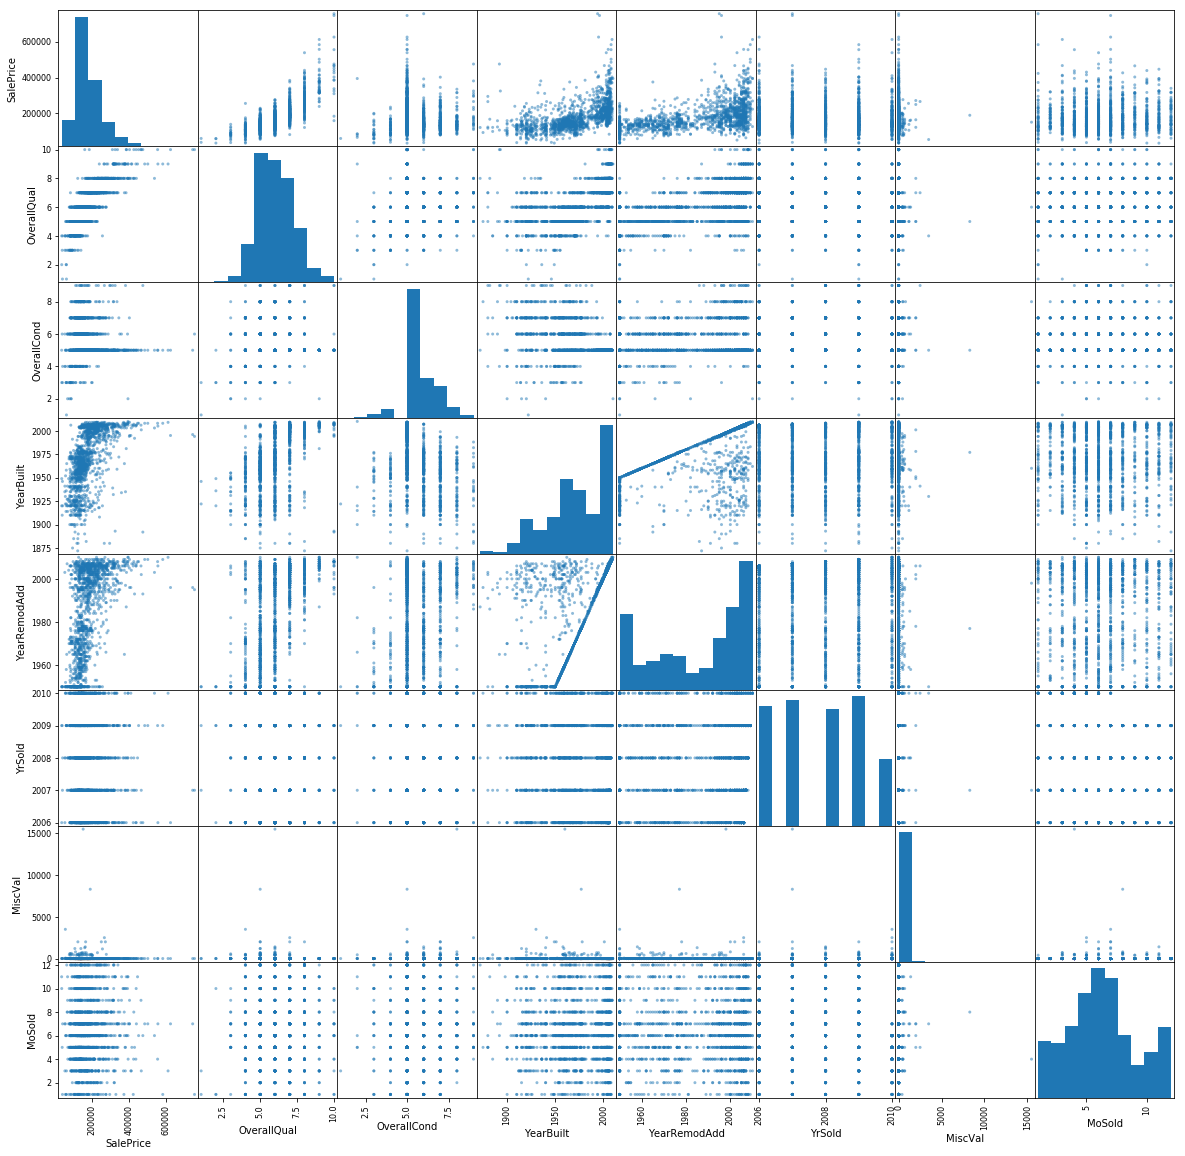

In [39]:
pd.scatter_matrix(df[major], figsize=(20,20))
df[major].corr()

OverallCond | 5
	Mean: 203146.914738 
	Median: 185000
	Minimum: 34900 
	Maximum: 745000 
	Count: 821 



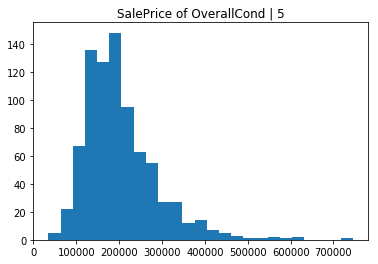

OverallCond | 8
	Mean: 155651.736111 
	Median: 142500
	Minimum: 84500 
	Maximum: 335000 
	Count: 72 



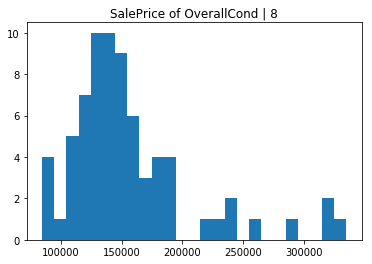

OverallCond | 6
	Mean: 153961.59127 
	Median: 142750
	Minimum: 37900 
	Maximum: 755000 
	Count: 252 



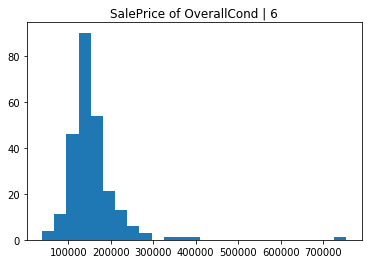

OverallCond | 7
	Mean: 158145.487805 
	Median: 145000
	Minimum: 79900 
	Maximum: 402000 
	Count: 205 



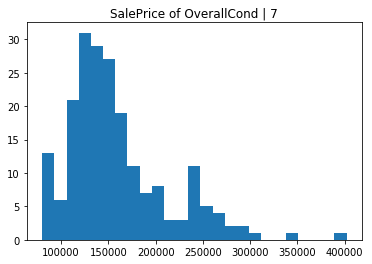

OverallCond | 4
	Mean: 120438.438596 
	Median: 115000
	Minimum: 40000 
	Maximum: 235000 
	Count: 57 



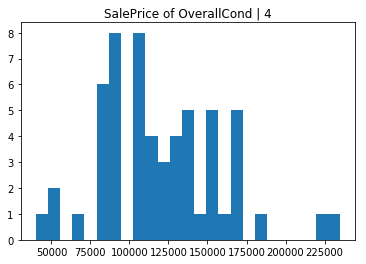

OverallCond | 2
	Mean: 141986.4 
	Median: 85000
	Minimum: 67000 
	Maximum: 394432 
	Count: 5 



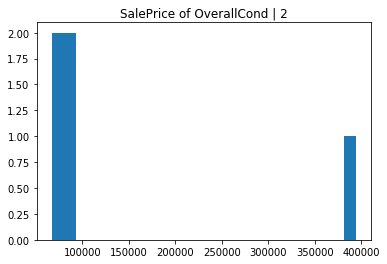

OverallCond | 3
	Mean: 101929.4 
	Median: 89500
	Minimum: 35311 
	Maximum: 200624 
	Count: 25 



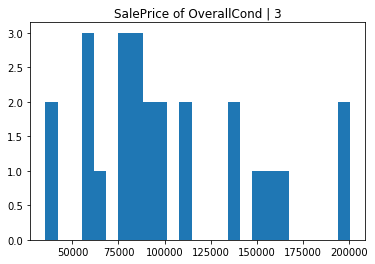

OverallCond | 9
	Mean: 216004.545455 
	Median: 176200
	Minimum: 110500 
	Maximum: 475000 
	Count: 22 



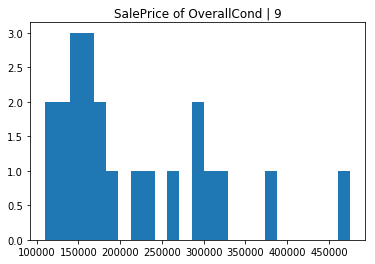

OverallCond | 1
	Mean: 61000.0 
	Median: 61000
	Minimum: 61000 
	Maximum: 61000 
	Count: 1 



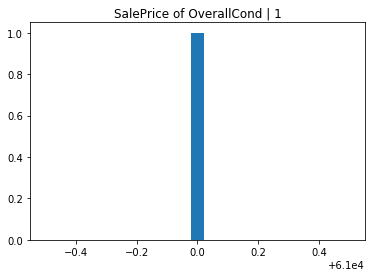

True

In [40]:
describe_categorical_feature(df, "OverallCond",25)

In [42]:
df_test = df.copy()
df_test.OverallCond = df_test.OverallCond.map(lambda x: 4 if (x==1) else x)
df_test.OverallCond = df_test.OverallCond.map(lambda x: 4 if (x==2) else x)
df_test.OverallCond = df_test.OverallCond.map(lambda x: 4 if (x==3) else x)
df_test.OverallCond = df_test.OverallCond.map(lambda x: 8 if (x==9) else x)
df_test[major].corr()

,SalePrice,OverallQual,OverallCond,YearBuilt,YearRemodAdd,YrSold,MiscVal,MoSold
SalePrice,1.000000,0.790982,-0.115033,0.522897,0.507101,-0.028923,-0.021190,0.046432
OverallQual,0.790982,1.000000,-0.141556,0.572323,0.550684,-0.027347,-0.031406,0.070815
OverallCond,-0.115033,-0.141556,1.000000,-0.418848,0.041228,0.051191,0.072254,-0.004634
YearBuilt,0.522897,0.572323,-0.418848,1.000000,0.592855,-0.013618,-0.034383,0.012398
YearRemodAdd,0.507101,0.550684,0.041228,0.592855,1.000000,0.035743,-0.010286,0.021490
YrSold,-0.028923,-0.027347,0.051191,-0.013618,0.035743,1.000000,0.004906,-0.145721
MiscVal,-0.021190,-0.031406,0.072254,-0.034383,-0.010286,0.004906,1.000000,-0.006495
MoSold,0.046432,0.070815,-0.004634,0.012398,0.021490,-0.145721,-0.006495,1.000000


MoSold | 2
	Mean: 177882.0 
	Median: 173250
	Minimum: 93000 
	Maximum: 320000 
	Count: 52 



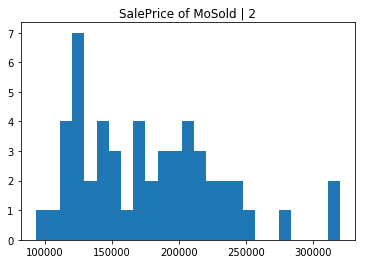

MoSold | 5
	Mean: 172307.269608 
	Median: 154000
	Minimum: 37900 
	Maximum: 430000 
	Count: 204 



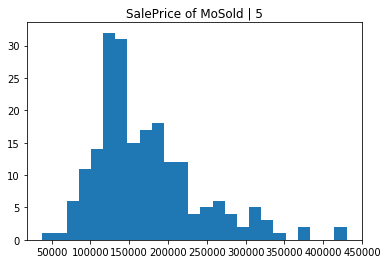

MoSold | 9
	Mean: 195683.206349 
	Median: 185900
	Minimum: 67000 
	Maximum: 465000 
	Count: 63 



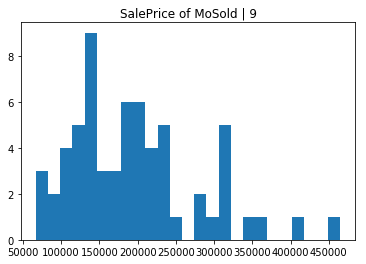

MoSold | 12
	Mean: 186518.966102 
	Median: 178000
	Minimum: 62383 
	Maximum: 340000 
	Count: 59 



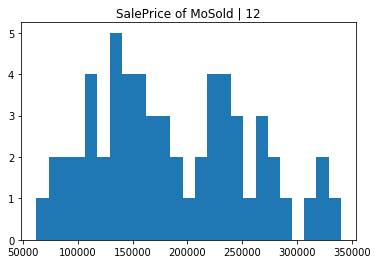

MoSold | 10
	Mean: 179563.977528 
	Median: 159000
	Minimum: 35311 
	Maximum: 438780 
	Count: 89 



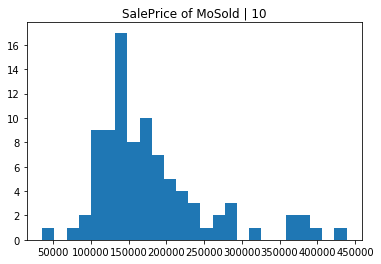

MoSold | 8
	Mean: 184651.827869 
	Median: 174450
	Minimum: 64500 
	Maximum: 426000 
	Count: 122 



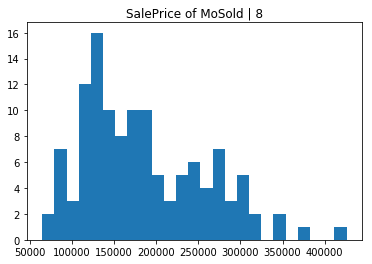

MoSold | 11
	Mean: 192210.911392 
	Median: 173000
	Minimum: 34900 
	Maximum: 446261 
	Count: 79 



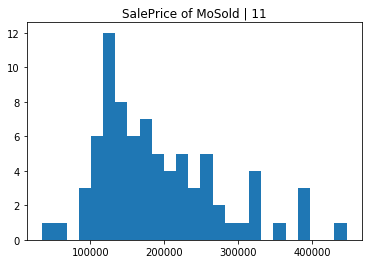

MoSold | 4
	Mean: 171503.262411 
	Median: 147000
	Minimum: 68400 
	Maximum: 555000 
	Count: 141 



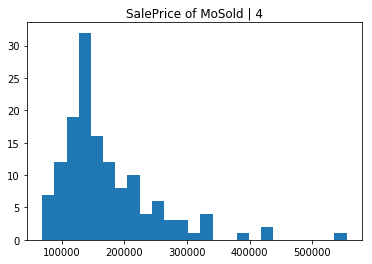

MoSold | 1
	Mean: 183256.258621 
	Median: 151650
	Minimum: 39300 
	Maximum: 755000 
	Count: 58 



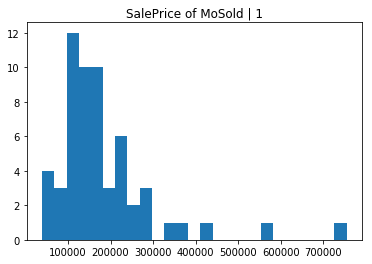

MoSold | 7
	Mean: 186331.192308 
	Median: 165195
	Minimum: 40000 
	Maximum: 745000 
	Count: 234 



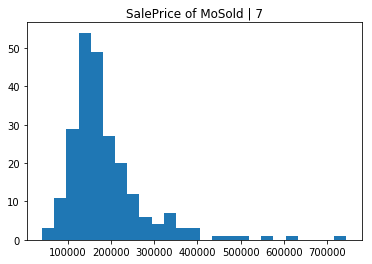

MoSold | 3
	Mean: 183253.924528 
	Median: 165250
	Minimum: 52500 
	Maximum: 611657 
	Count: 106 



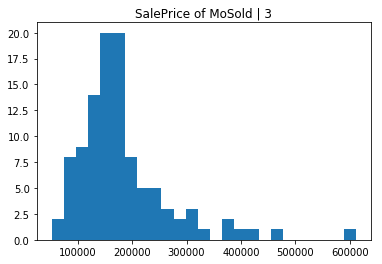

MoSold | 6
	Mean: 177395.735178 
	Median: 163000
	Minimum: 55993 
	Maximum: 538000 
	Count: 253 



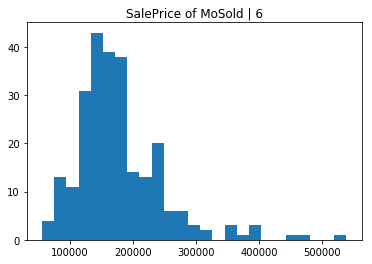

True

In [43]:
describe_categorical_feature(df, "MoSold",25)

### Major Group
- There is a high positive correlation between OverallQual and SalePrice at 0.79. The OverallQual is the overall material and finish quality. YearBuilt and YearRemodAdd also have a high positive correlation with Sale Price at 0.52 and 0.507 respectively. 
- MiscVal has very little correlation with any of the other features and we should consider removing it as it is a redundant feature.
- OverallCond has very little correlation with any other features except a negative correlation with YearBuilt. Combining into groups didn't improve any of the correlations except a slight improvement with YearBuilt. We should consider removing this feature.
- YearSold has very little correlation with any other feature. Consider removing.
- MoSold has very little correlation with any other feature. Consider removing.

    - CONSIDER REMOVING MiscVal
    - CONSIDER REMOVING OverallCond
    - CONSIDER REMOVING YearSold
    - CONSIDER REMOVING Mo Sold

## Basement Evaluation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,SalePrice,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
SalePrice,1.000000,0.386420,-0.011378,0.214479,0.613581
BsmtFinSF1,0.386420,1.000000,-0.050117,-0.495251,0.522396
BsmtFinSF2,-0.011378,-0.050117,1.000000,-0.209294,0.104810
BsmtUnfSF,0.214479,-0.495251,-0.209294,1.000000,0.415360
TotalBsmtSF,0.613581,0.522396,0.104810,0.415360,1.000000


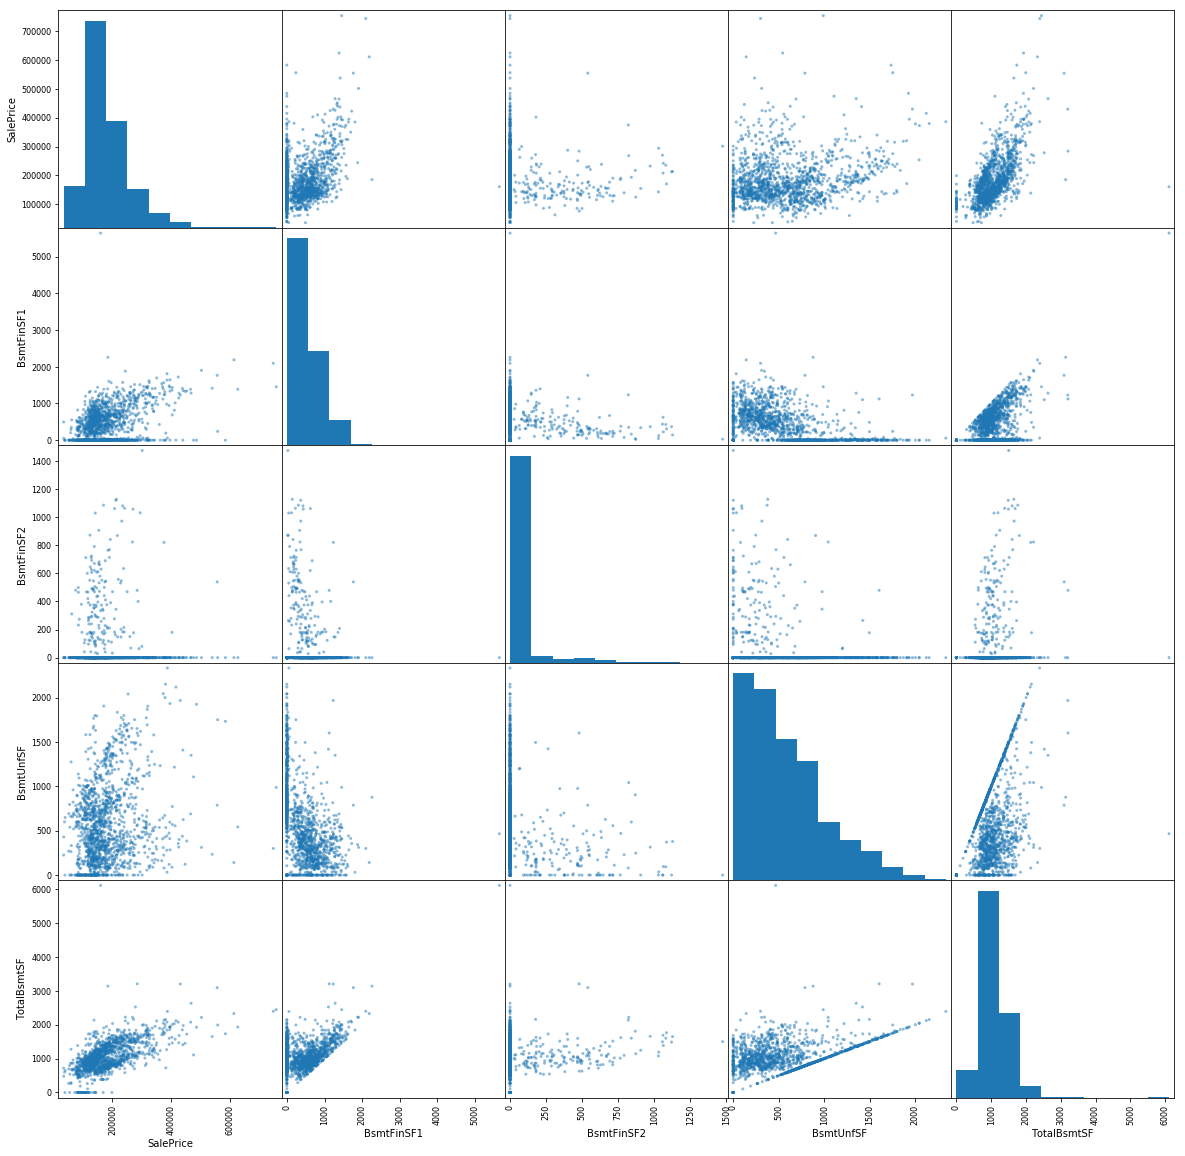

In [51]:
pd.scatter_matrix(df[basement], figsize=(20,20))
df[basement].corr()

In [52]:
test = pd.DataFrame(df.BsmtFinSF1.astype(float) + df.BsmtFinSF2.astype(float) + df.BsmtUnfSF.astype(float))
test["sales"] = df.SalePrice
test["TotalSF"] = df.TotalBsmtSF
test.corr()

,0,sales,TotalSF
0,1.000000,0.613581,1.000000
sales,0.613581,1.000000,0.613581
TotalSF,1.000000,0.613581,1.000000


### Basement 
- There is a high positive correlation between TotalBsmtSF and SalePrice of 0.613 as well as a high correlation between TotalBsmtSF and BsmtFinSF1 of 0.52. 
- BsmtFinSF1, BsmtFinSF2, and BsmtUnfSF should be removed as the sum of these three features is equal to TotalBsmtSF and thus making these three features redundant.

    CONSIDER REMOVING BsmtFinSF1, BsmtFinSF2, BsmtUnfSF because they are REDUNDANT

## Floors Evaluation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
SalePrice,1.000000,0.605852,0.319334,-0.025606,0.708624
1stFlrSF,0.605852,1.000000,-0.202646,-0.014241,0.566024
2ndFlrSF,0.319334,-0.202646,1.000000,0.063353,0.687501
LowQualFinSF,-0.025606,-0.014241,0.063353,1.000000,0.134683
GrLivArea,0.708624,0.566024,0.687501,0.134683,1.000000


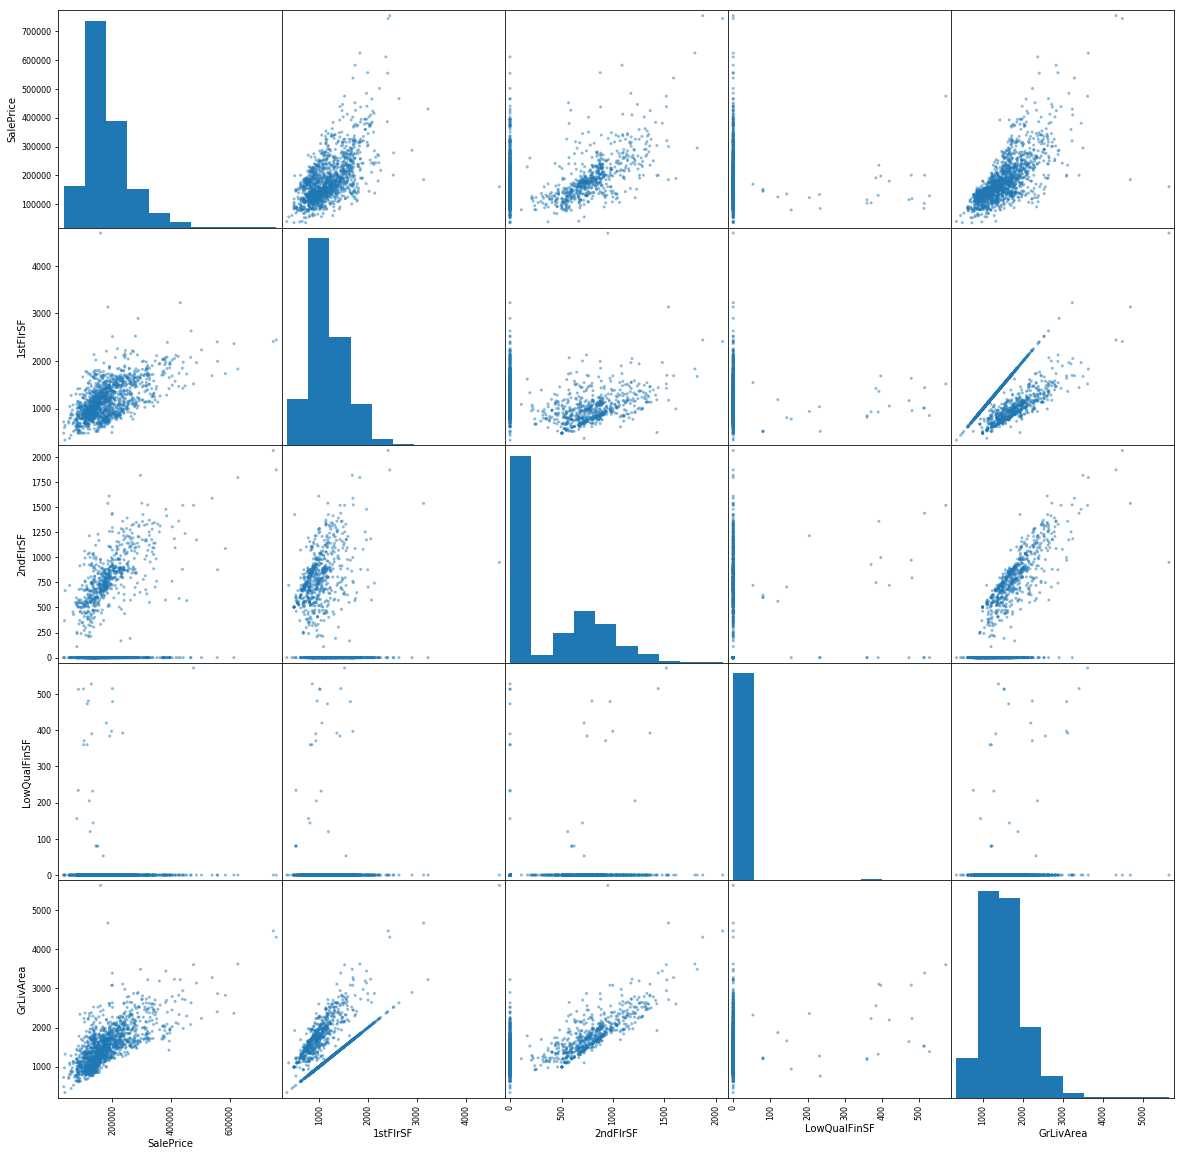

In [53]:
pd.scatter_matrix(df[floors], figsize=(20,20))
df[floors].corr()

### Floors
- There is a high positive correlation between GrLivArea and SalePrice of 0.71 and a high positive correlation between 1stFlrSF and SalePrice of 0.61. Furthermore there is high positive correlation between GrLivArea and 1stFlrSF and 2ndFlrSF. Consider removing 1stFlrSF and 2ndFlrSF as they are redundant in terms of GrLivArea.
- LowQualFinSF is full of zeros and thus has low correlation with every other feature. Consider normalizing data in order to see if there is a stronger correlation present.

    CONSIDER REMOVING 1stFlrSF and 2ndFlrSF for being REDUNDANT

## Outdoors Evaluation

/Users/sharoniegreenblatt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


,SalePrice,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea
SalePrice,1.000000,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,0.477493
WoodDeckSF,0.324413,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,0.159718
OpenPorchSF,0.315856,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,0.125703
EnclosedPorch,-0.128578,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,-0.110204
3SsnPorch,0.044584,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.018796
ScreenPorch,0.111447,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.061466
PoolArea,0.092404,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.011723
MasVnrArea,0.477493,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,1.000000


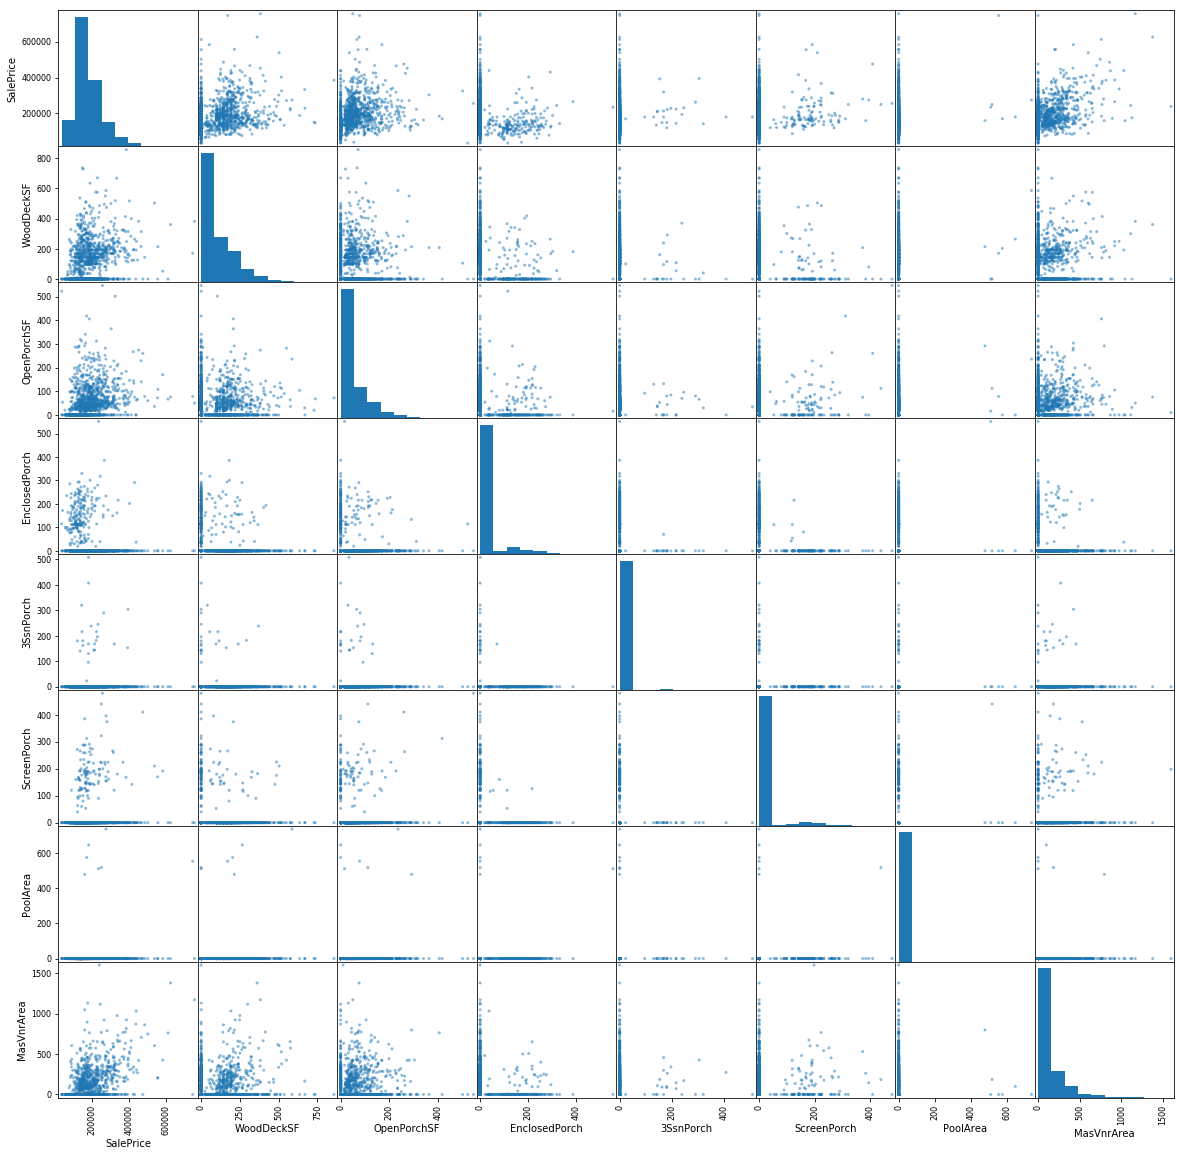

In [54]:
pd.scatter_matrix(df[outdoors], figsize=(20,20))
df[outdoors].corr()

In [55]:
df.ScreenPorch.describe()

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64

### Outdoors
- Many of these features have data points with values of zero. It might be helpful to normalize the data to see if there are better correlations before decieding whether or not to remove these features.